In [280]:

from keras.models import Sequential
from keras import layers

In [281]:
from keras.preprocessing.image import ImageDataGenerator

In [282]:
model = models.Sequential()

In [283]:
train_datagen = ImageDataGenerator(
                rescale = 1. / 255)

In [284]:
from keras import backend as K

In [285]:
img_width, img_height = 150, 150


In [286]:
train_data_dir = 'bacteria_data/train'

In [287]:
train_data_dir


'bacteria_data/train'

In [288]:
validation_data_dir = 'bacteria_data/validation/'

In [289]:
nb_train_samples = 16

In [290]:
nb_validation_samples = 4

In [291]:
epochs = 2

In [292]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [293]:
train_datagen = ImageDataGenerator(
                rescale = 1. / 255)

In [294]:
import numpy


In [295]:
import matplotlib

In [296]:
import os

In [297]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [298]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'categorical',
                                                   batch_size = 32)

Found 98 images belonging to 7 classes.


In [299]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                       target_size=(img_width, img_height),
                                                       class_mode = 'categorical',
                                                       batch_size = 32)

Found 42 images belonging to 7 classes.


In [300]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

('data batch shape:', (32, 150, 150, 3))
('labels batch shape:', (32, 7))


In [303]:
model.add(layers.Conv2D(16, (3,3), activation='relu',input_shape=(150,150,3)))

model.add(layers.MaxPooling2D((2,2))

In [304]:
model.add(layers.MaxPooling2D((2,2)))

In [305]:
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [306]:
model.add(layers.MaxPooling2D((2,2)))

In [307]:
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [308]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 64)        9280      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 64)        36928     
Total para

In [309]:
model.add(layers.Flatten())

In [310]:
model.add(layers.Dense((64), activation='relu'))

In [311]:
model.add(layers.Dense((7), activation='sigmoid'))

In [312]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 64)        9280      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 64)        36928     
__________

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [313]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [314]:
hist = model.fit_generator(train_generator,
                   steps_per_epoch = 100,
                   epochs=epochs,
                   validation_data = validation_generator,
                   validation_steps=50)

Epoch 1/2
100/100 [==============================] - 991s 10s/step - loss: 1.8140 - acc: 0.2826 - val_loss: 1.4514 - val_acc: 0.2857
Epoch 2/2
100/100 [==============================] - 444s 4s/step - loss: 1.3605 - acc: 0.4298 - val_loss: 1.5345 - val_acc: 0.3571


In [315]:
model.save('bact_class_ver1.h5')

In [316]:
import matplotlib.pyplot as plt


In [317]:
acc = hist.history['acc']

In [318]:
val_acc = hist.history['val_acc']

In [319]:
loss = hist.history['loss']

In [320]:
val_loss = hist.history['val_loss']

In [321]:
epochs = range(1, len(acc)  +1)

In [332]:
plt.plot(epochs, acc, 'b--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

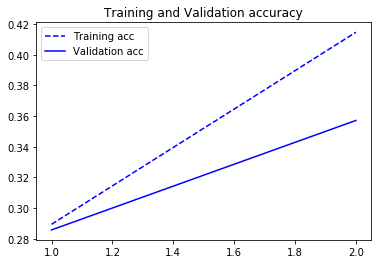

In [333]:
plt.figure()
plt.show()

In [328]:
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

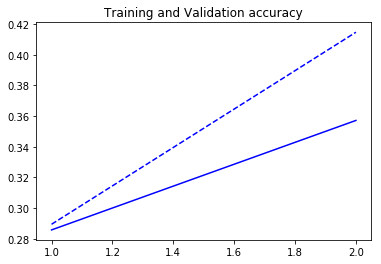

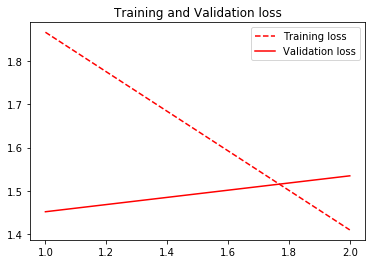

In [329]:
plt.show()